In [57]:
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import plotly as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Dataset\leads.csv')

In [3]:
df.head() #checking for the data entries

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
df.shape

(9240, 37)

In [12]:
df.info()  #data information to check for RV and CV

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

There are 7 Continuous Values namely:
1.  Lead Number
2.  Converted 
3.  Total Visits
4.  Total time spent on website
5.  Page views per visit 
6.  Assymetric activity score
7.  Assymetric profile score

There are 30 Categorical values namely:


1. Prospect ID
2. Lead Origin
3. Lead Source    
4. Do Not Email
5. Do Not Call
6. Last Activity                                  
7. Country                                         
8. Specialization                                  
9. How did you hear about X Education              
10. What is your current occupation                 
11. What matters most to you in choosing a course   
12. Search                                          
13. Magazine                                        
14. Newspaper Article                               
15. X Education Forums                              
16. Newspaper                                       
17. Digital Advertisement                           
18. Through Recommendations                         
19. Receive More Updates About Our Courses          
20. Tags                                            
21. Lead Quality                                    
22. Update me on Supply Chain Content               
23. Get updates on DM Content                       
24. Lead Profile                                    
25. City                                            
26. Asymmetrique Activity Index                     
27. Asymmetrique Profile Index                      
28. I agree to pay the amount through cheque        
29. A free copy of Mastering The Interview          
30. Last Notable Activity                           

In [14]:
df['Prospect ID'].duplicated().sum()  #Checking for dupliacted entries

0

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0


In [21]:
print('Average conversion rate is: {0} %'.format((df['Converted'].mean())*100))

Average conversion rate is: 38.53896103896104 %


In [27]:
df = df.replace('Select', np.nan)

In [28]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [29]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [30]:
drops = ['Lead Profile','How did you hear about X Education'] #We can drop these columns as null values are greater than 70%

In [32]:
df_dropped = df.drop(drops, axis=1)

In [34]:
df_dropped.shape

(9240, 35)

In [35]:
#Now we will deal with other columns one by one

In [51]:
df_dropped['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
Pay per Click Ads       1
WeLearn                 1
blog                    1
NC_EDM                  1
welearnblog_Home        1
testone                 1
youtubechannel          1
Name: Lead Source, dtype: int64

In [52]:
df_dropped['Lead Source'].isnull().sum()

36

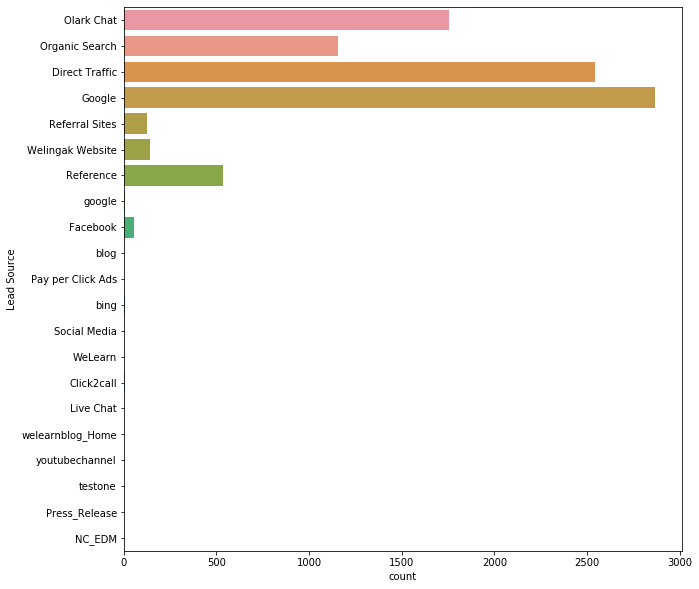

In [61]:
plot = plt.figure(figsize=(10,10))

chart = sns.countplot(y=df_dropped['Lead Source'])



Infrence: Since most of the lead source is from google, we can fillna values with google

In [62]:
df_dropped['Lead Source'] = df_dropped['Lead Source'].fillna('Google')

In [64]:
df_dropped['TotalVisits'].isna().sum()

137

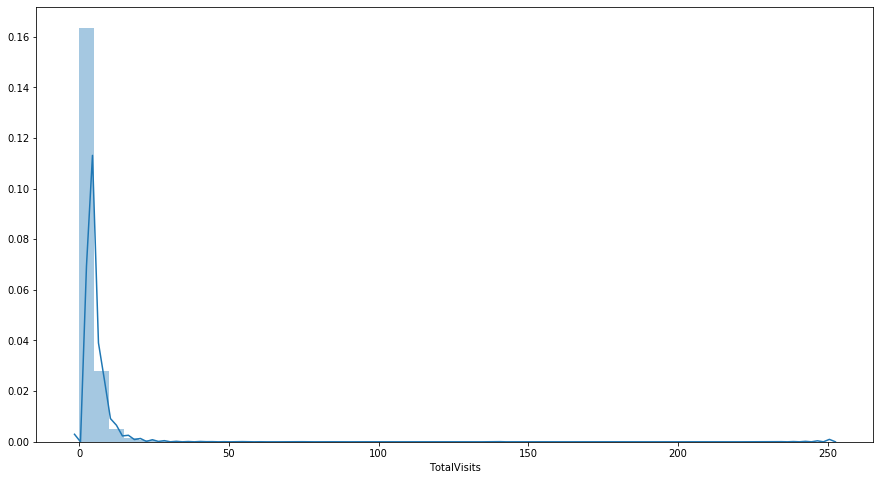

In [68]:
plot = plt.figure(figsize=(15,8))
sns.distplot(df_dropped['TotalVisits'])
plt.show()

In [69]:
df_dropped['TotalVisits'].mean()

3.445237833681204

In [70]:
df_dropped['TotalVisits'].median()

3.0

In [71]:
df_dropped['TotalVisits'] = df_dropped['TotalVisits'].fillna(df_dropped['TotalVisits'].median()) #Fillna with median

In [72]:
df_dropped['Page Views Per Visit']

0       0.00
1       2.50
2       2.00
3       1.00
4       1.00
        ... 
9235    2.67
9236    2.00
9237    2.00
9238    3.00
9239    3.00
Name: Page Views Per Visit, Length: 9240, dtype: float64

In [73]:
df_dropped['Page Views Per Visit'].mean()

2.3628199494672093

In [74]:
df_dropped['Page Views Per Visit'].median()

2.0

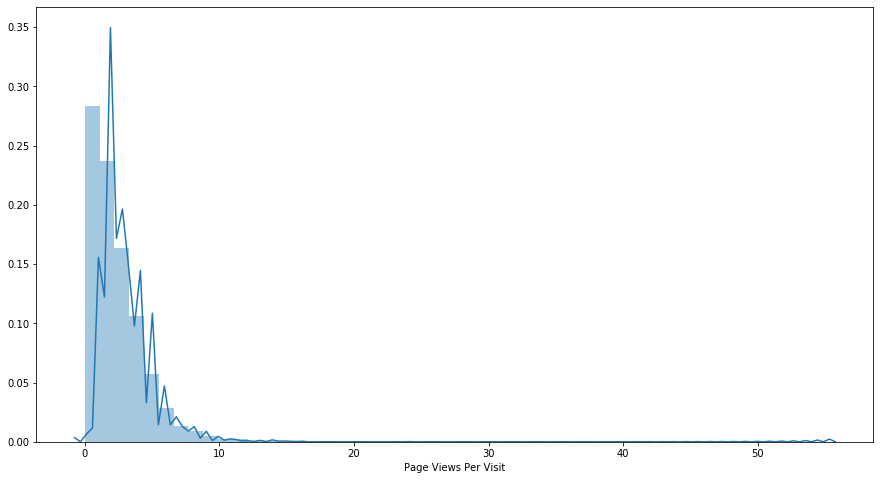

In [78]:
plt.figure(figsize=(15,8))
sns.distplot(df_dropped['Page Views Per Visit'])
plt.show()

In [79]:
df_dropped['Page Views Per Visit'].isna().sum()

137

In [80]:
df_dropped['Page Views Per Visit'] = df_dropped['Page Views Per Visit'].fillna(df_dropped['Page Views Per Visit'].median())

In [81]:
df_dropped['Page Views Per Visit'].isna().sum()

0

In [82]:
df_dropped['Last Activity']

0       Page Visited on Website
1                  Email Opened
2                  Email Opened
3                   Unreachable
4             Converted to Lead
                 ...           
9235          Email Marked Spam
9236                   SMS Sent
9237                   SMS Sent
9238                   SMS Sent
9239                   SMS Sent
Name: Last Activity, Length: 9240, dtype: object

In [83]:
df_dropped['Last Activity'].mode()

0    Email Opened
dtype: object

In [89]:
df_dropped['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked', nan,
       'Approached upfront', 'SMS Sent', 'Visited Booth in Tradeshow',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [88]:
len(df_dropped['Last Activity'].unique())

18

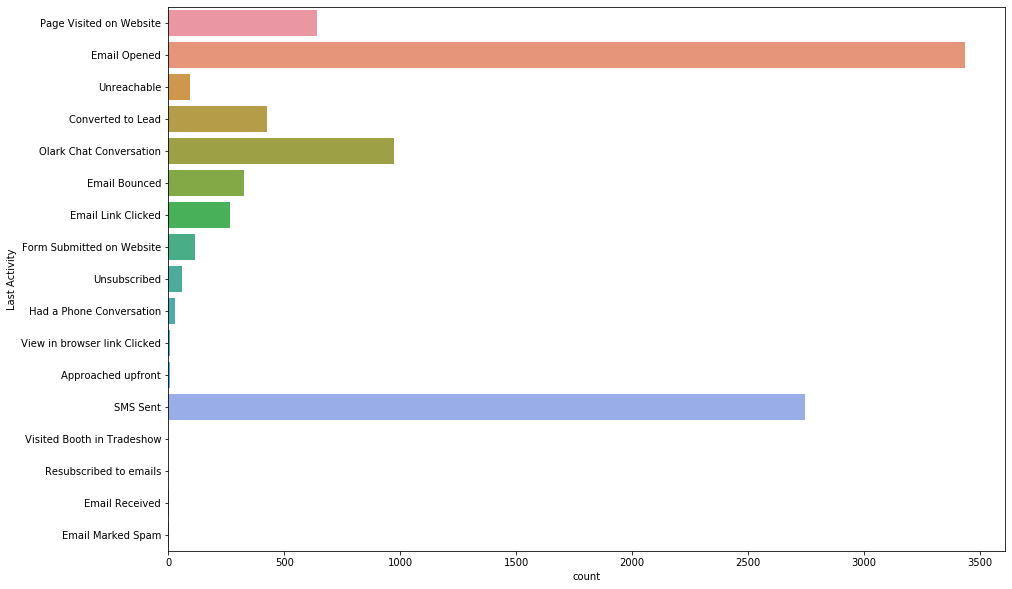

In [90]:
plt.figure(figsize=(15,10))

sns.countplot(y=df_dropped['Last Activity'])

plt.show()

In [91]:
#Clearly mode is 'mail opened' so it would okay to impute nan with that value

In [92]:
df_dropped['Last Activity'] = df_dropped['Last Activity'].fillna('Email Opened')

In [93]:
df_dropped['Country']

0                NaN
1              India
2              India
3              India
4              India
            ...     
9235    Saudi Arabia
9236           India
9237           India
9238           India
9239      Bangladesh
Name: Country, Length: 9240, dtype: object

In [96]:
df_dropped['Country'].unique()

array([nan, 'India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

In [97]:
len(df_dropped['Country'].unique())

39

In [98]:
df_dropped['Country'].isna().sum()

2461

In [99]:
df_dropped['Country'].mode()

0    India
dtype: object

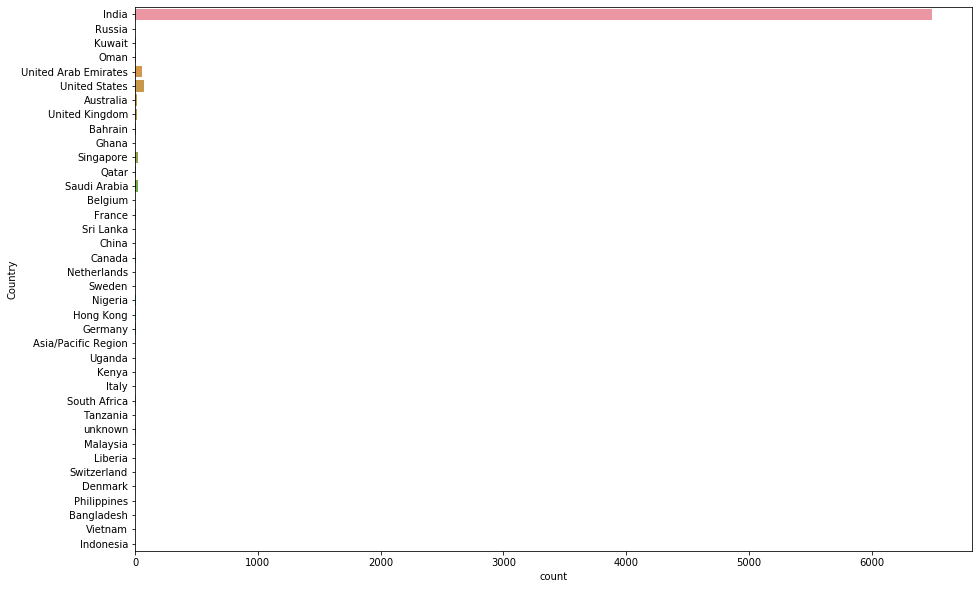

In [100]:
plt.figure(figsize=(15,10))

sns.countplot(y=df_dropped['Country'])

plt.show()

In [101]:
#We will be filling na with mode

In [102]:
df_dropped['Country'] = df_dropped['Country'].fillna('India')

In [104]:
df_dropped['Specialization']

0                             NaN
1                             NaN
2         Business Administration
3           Media and Advertising
4                             NaN
                  ...            
9235       IT Projects Management
9236        Media and Advertising
9237      Business Administration
9238    Human Resource Management
9239      Supply Chain Management
Name: Specialization, Length: 9240, dtype: object

In [105]:
df_dropped['Specialization'].isna().sum()

3380

In [106]:
df_dropped['Specialization'].mode()

0    Finance Management
dtype: object

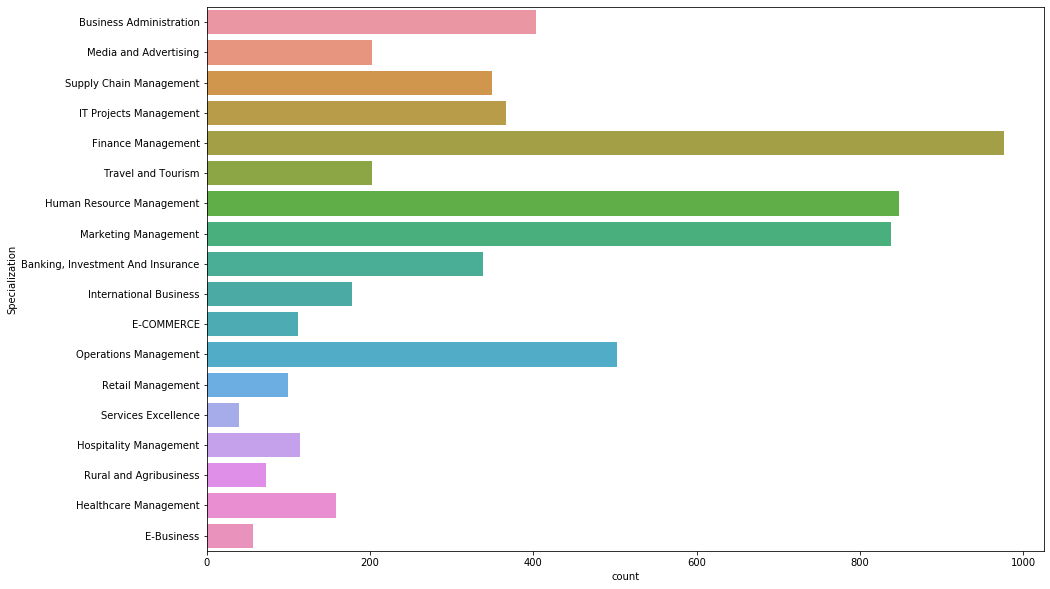

In [107]:
plt.figure(figsize=(15,10))

sns.countplot(y=df_dropped['Specialization'])

plt.show()

In [108]:
# replacing nan with mode value although it can lead to heavy assumption 

df_dropped['Specialization'] = df_dropped['Specialization'].fillna('Finance Management')

In [110]:
df_dropped['What is your current occupation']

0       Unemployed
1       Unemployed
2          Student
3       Unemployed
4       Unemployed
           ...    
9235    Unemployed
9236    Unemployed
9237    Unemployed
9238           NaN
9239    Unemployed
Name: What is your current occupation, Length: 9240, dtype: object

In [111]:
df_dropped['What is your current occupation'].isna().sum()

2690

In [114]:
df_dropped['What is your current occupation'].mode()

0    Unemployed
dtype: object

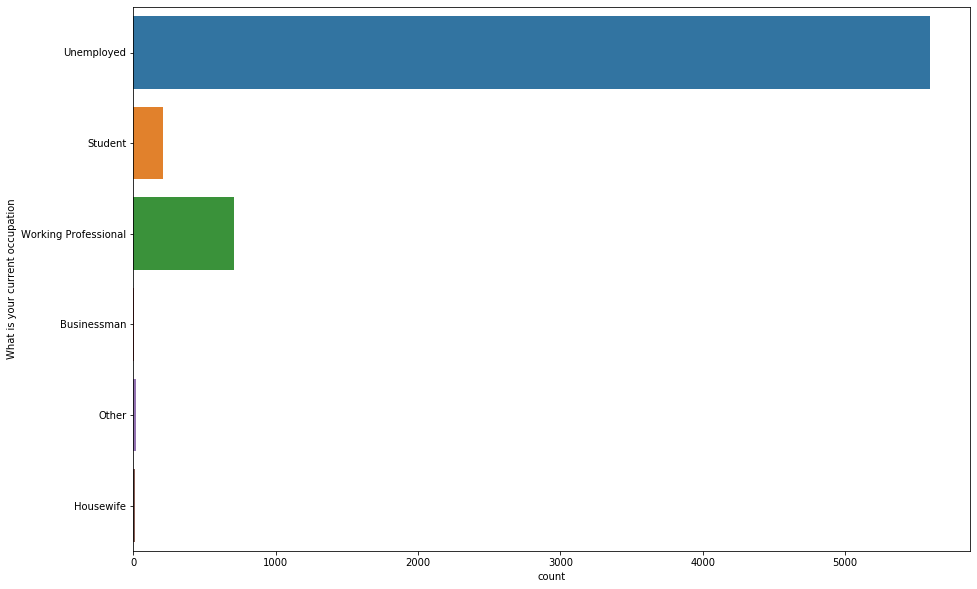

In [115]:
plt.figure(figsize=(15,10))

sns.countplot(y=df_dropped['What is your current occupation'])

plt.show()

In [116]:
df_dropped['What is your current occupation'] = df_dropped['What is your current occupation'].fillna('Unemployed')

In [117]:
df_dropped['What matters most to you in choosing a course']

0       Better Career Prospects
1       Better Career Prospects
2       Better Career Prospects
3       Better Career Prospects
4       Better Career Prospects
                 ...           
9235    Better Career Prospects
9236    Better Career Prospects
9237    Better Career Prospects
9238                        NaN
9239    Better Career Prospects
Name: What matters most to you in choosing a course, Length: 9240, dtype: object

In [118]:
df_dropped['What matters most to you in choosing a course'].unique()

array(['Better Career Prospects', nan, 'Flexibility & Convenience',
       'Other'], dtype=object)

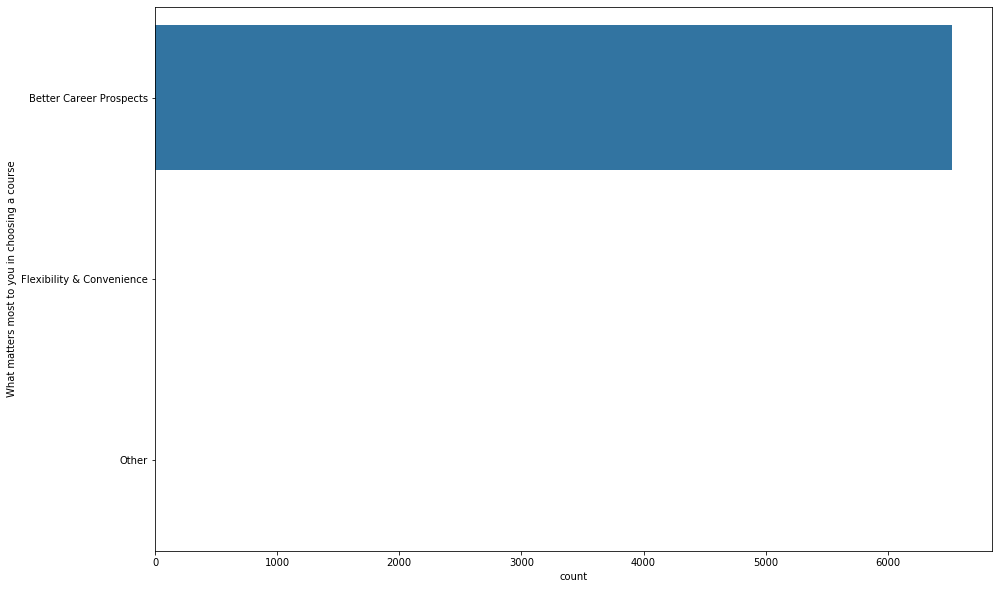

In [119]:
plt.figure(figsize=(15,10))

sns.countplot(y=df_dropped['What matters most to you in choosing a course'])

plt.show()

In [120]:
df_dropped['What matters most to you in choosing a course'] = df_dropped['What matters most to you in choosing a course'].fillna('Better Career Prospects')

In [121]:
df_dropped['Tags']

0               Interested in other courses
1                                   Ringing
2       Will revert after reading the email
3                                   Ringing
4       Will revert after reading the email
                       ...                 
9235    Will revert after reading the email
9236                     wrong number given
9237                         invalid number
9238                                    NaN
9239    Will revert after reading the email
Name: Tags, Length: 9240, dtype: object

In [122]:
df_dropped['Tags'].isna().sum()

3353

In [123]:
df_dropped["Tags"].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

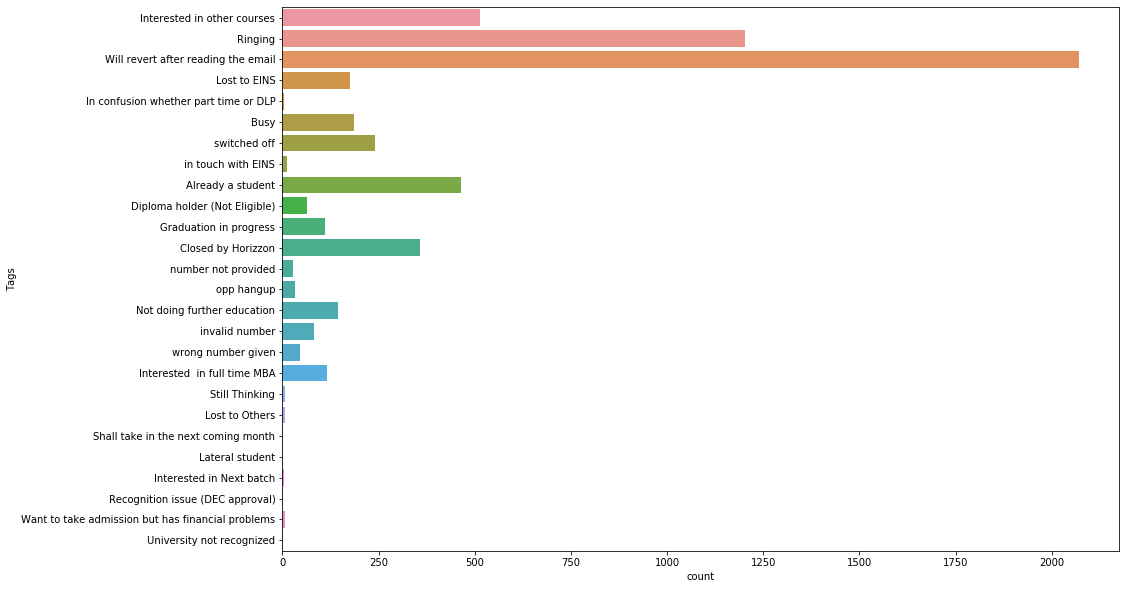

In [124]:
plt.figure(figsize=(15,10))

sns.countplot(y=df_dropped['Tags'])

plt.show()

In [125]:
df_dropped['Tags'] = df_dropped['Tags'].fillna('Will revert after reading the mail')

In [126]:
df_dropped['Lead Quality']

0        Low in Relevance
1                     NaN
2                Might be
3                Not Sure
4                Might be
              ...        
9235    High in Relevance
9236             Might be
9237             Not Sure
9238                  NaN
9239             Might be
Name: Lead Quality, Length: 9240, dtype: object

In [127]:
df_dropped['Lead Quality'].isna().sum()

4767

In [128]:
df_dropped['Lead Quality'].unique()

array(['Low in Relevance', nan, 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

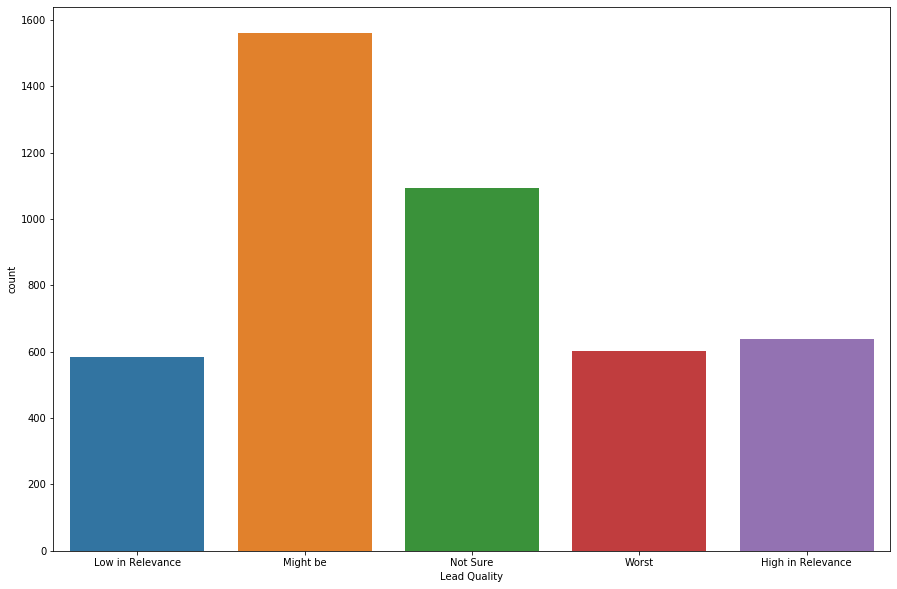

In [129]:
plt.figure(figsize=(15,10))

sns.countplot(x = df_dropped['Lead Quality'])

plt.show()

In [130]:
df_dropped['Lead Quality'] = df_dropped['Lead Quality'].fillna('Not Sure')

In [131]:
df_dropped['City']

0                      NaN
1                      NaN
2                   Mumbai
3                   Mumbai
4                   Mumbai
               ...        
9235                Mumbai
9236                Mumbai
9237                Mumbai
9238    Other Metro Cities
9239          Other Cities
Name: City, Length: 9240, dtype: object

In [132]:
df_dropped['City'].isna().sum()

3669

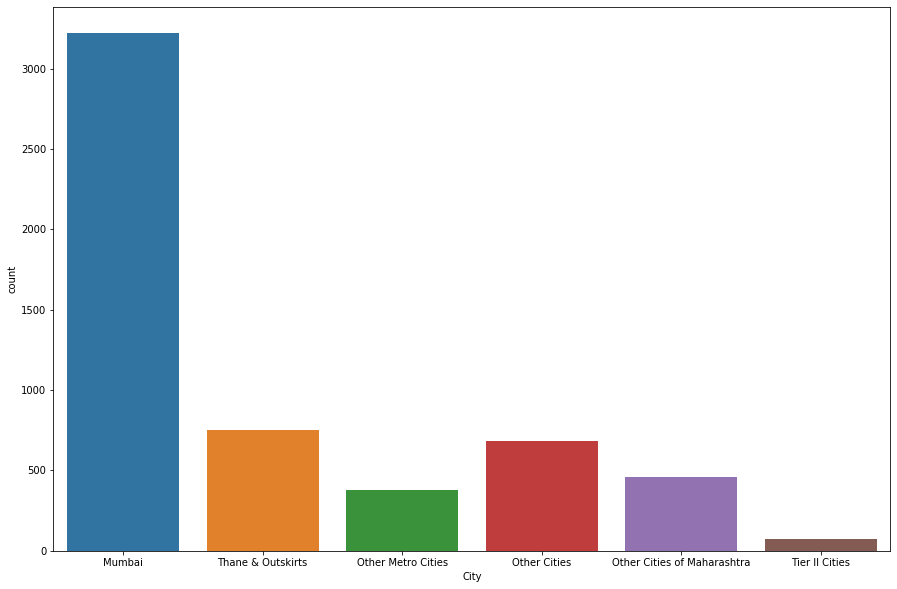

In [133]:
plt.figure(figsize=(15,10))

sns.countplot(x=df_dropped['City'])

plt.show()

In [134]:
df_dropped['City'] = df_dropped['City'].fillna('Mumbai')

In [ ]:


df_dropped = df_dropped.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

